In [18]:
from keras.layers import *
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [20]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [21]:
(XT,YT),(Xt,Yt) = mnist.load_data()

In [22]:
XT.shape,YT.shape,Xt.shape,Yt.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [23]:
def preprocess_data(X,Y):
    X = X.reshape((-1,28,28,1))
    X = X/255.0
    
    Y = to_categorical(Y)
    
    return X,Y

In [24]:
XT,YT = preprocess_data(XT,YT)

In [25]:
XT.shape,YT.shape

((60000, 28, 28, 1), (60000, 10))

In [26]:
Xt,Yt = preprocess_data(Xt,Yt)

In [27]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [28]:
hist = model.fit(XT,YT,epochs=20,batch_size = 512)

Epoch 1/20
118/118 [==============================] - 30s 240ms/step - loss: 0.9980 - acc: 0.7230
Epoch 2/20
118/118 [==============================] - 28s 234ms/step - loss: 0.1234 - acc: 0.9634
Epoch 3/20
118/118 [==============================] - 28s 235ms/step - loss: 0.0741 - acc: 0.9771
Epoch 4/20
118/118 [==============================] - 28s 234ms/step - loss: 0.0614 - acc: 0.9810
Epoch 5/20
118/118 [==============================] - 28s 240ms/step - loss: 0.0493 - acc: 0.9852
Epoch 6/20
118/118 [==============================] - 25s 215ms/step - loss: 0.0414 - acc: 0.9874
Epoch 7/20
118/118 [==============================] - 21s 182ms/step - loss: 0.0358 - acc: 0.9885
Epoch 8/20
118/118 [==============================] - 23s 191ms/step - loss: 0.0325 - acc: 0.9902
Epoch 9/20
118/118 [==============================] - 22s 184ms/step - loss: 0.0264 - acc: 0.9921
Epoch 10/20
118/118 [==============================] - 23s 190ms/step - loss: 0.0241 - acc: 0.9928
Epoch 11/20
118/118

## Deep Networks with small training-data-sets are often prone to overfitting

This can be handled by image augmentation

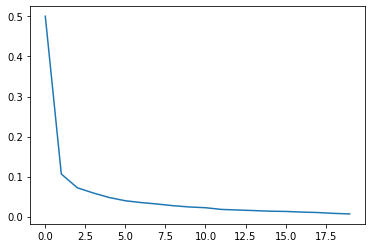

In [30]:
from matplotlib import pyplot as plt
plt.plot(hist.history['loss'])
plt.show()

In [31]:
model.evaluate(Xt,Yt)

313/313 [==============================] - 6s 12ms/step - loss: 0.0278 - acc: 0.9922


[0.027821805328130722, 0.9922000169754028]